# INSTRUCTIONS: 
* Make your own copy of the Notebook before starting the assignment. 
  **File** -> **save a copy in Drive**

* Fill the place holders in the notebook which are indicated with `FILL`.

# PREREQUISITES
* The datasets need to be downloaded. Please download and unzip the `Gestures.zip` to find the datasets (Punch and Flex gestures)

# UPLOAD:
A `zip` file containing
1. The completed notebook.
2. The TF Lite micro model (The header file)


# The requirement:

You are asked to create a Gesture Detection model for MCUs that can detect a ***punch*** or a ***flex*** gesture by a potential client. The clients would like to recognise any gestures using the data gathered by the onboard ***IMU (Inertial Measurement Unit)*** that provides Gyroscopic and Accelerometer data.



## Prerequisites

Download the `punch.csv` and `flex.csv` files into a local folder from [this](https://drive.google.com/drive/folders/1aKcovgxE6bhNEng7pQdsst2ntqEO0wlf?usp=share_link) link

Acknowledgement:

Contents of the notebook are based on Don Coleman, Sandeep Mistry's Gesture recognition exercise 

### Important preliminary libraries

import the necessary libraries that you see fit. `Numpy`, `Pandas` and `Tensorflow` are mandatory

In [ ]:
# FILL
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install "tensorflow>=2.0.0-rc1"

#### Method used by me:
* Uploading the `punch.csv` & `flex.csv` into the colab session using `google.colab.files`

#### Alternatively you can...:
1. Open the panel on the left side of Colab by clicking on the __>__
1. Select the files tab
1. Drag `punch.csv` and `flex.csv` files from your computer to the tab to upload them into colab.

In [ ]:
from google.colab import files

uploaded = files.upload()

# Flex Data

Reading and analysing the data imported. You can use a special function in `Pandas` to read a CSV file

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
#flex.info()

filename = "flex.csv"
df = pd.read_csv("/content/" + filename)
df
# if you look closely at the output, it seems like there's a null value in the column "aY" 
# (All others are 3690, aY is 3689 - One data point is missing)
# Read the cell below


A rogue, incomplete has been injected into the first row of the dataset (See figure below). It's important to remove any null values at the start itself. This is to prevent any problems that arise later down the pipeline. 

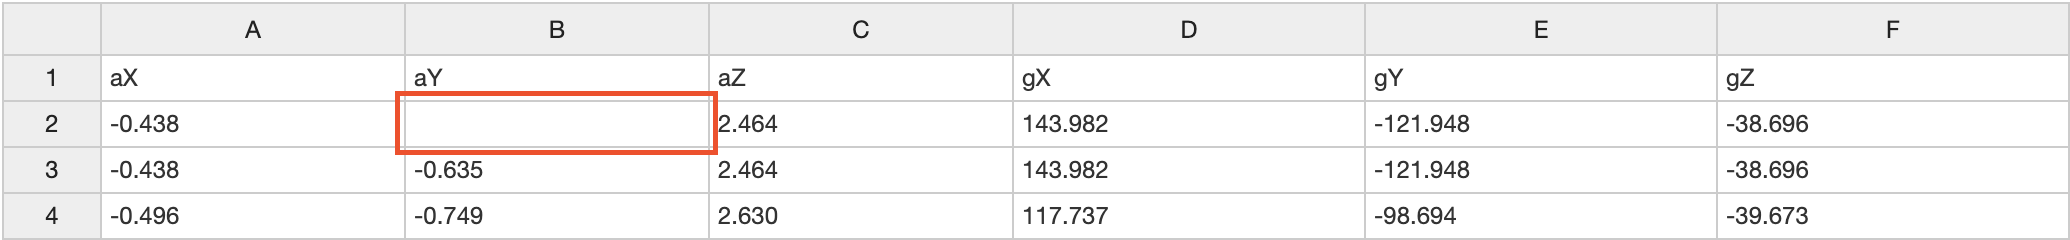

To do this, you can call another important function available for `pandas`. You can invoke the `.dropna()` function.


In [ ]:
# You can call the `dropna()` function as follows
# <the dataframe>.dropna()
# E.g., df.dropna()
# FILL 
newdf = df.dropna()
newdf


Visualising the data

Now that you have gotten rid of any null values in the dataset. Let's visualize the data.

In [ ]:
flex_index = range(1, len(df['aX']) + 1) # The range of data we want to visualize
flex_index = range(1, len(df['aY']) + 1) # The range of data we want to visualize
flex_index = range(1, len(df['aZ']) + 1) # The range of data we want to visualize

The line for `aX` has been plotted. Do the same for `aY` and `aZ`

In [ ]:
plt.figure(figsize=(20,10)) #Setting the figure size 
plt.plot(flex_index, df['aX'], 'g', label='x')
plt.plot(flex_index, df['aY'], 'b', label='y')
plt.plot(flex_index, df['aZ'], 'r', label='z')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

Copy the contents of the previous cell and try to visualize the data for the Gyroscope data

In [ ]:
# FILL
plt.figure(figsize=(20,10)) #Setting the figure size 
plt.plot(flex_index, df['gX'], 'g', label='x')
plt.plot(flex_index, df['gY'], 'b', label='y')
plt.plot(flex_index, df['gZ'], 'r', label='z')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

# Punch

Read the Punch data. Analyse to see if there are any null values using the `.info()` function.

In [ ]:
punch = pd.read_csv("punch.csv")

Call the `.info()` function here to see if there are any null values in the dataset.

In [ ]:
# <DataFrame>.info()
# FILL

filename = "punch.csv"
df = pd.read_csv("/content/" + filename)
df

In [ ]:
punch_index = range(1, len(df['aX']) + 1)
punch_index = range(1, len(df['aY']) + 1)
punch_index = range(1, len(df['aZ']) + 1)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(punch_index, punch['aX'], 'g' , label='x')
plt.plot(punch_index, punch['aY'], 'b', label='y')
plt.plot(punch_index, punch['aZ'], 'r', label='z')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(punch_index, punch['gX'], 'g', label='x')
plt.plot(punch_index, punch['gY'], 'b', label='y')
plt.plot(punch_index, punch['gZ'], 'r', label='z')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()

# Compiling the dataset

Add the names of the `csv` files inside the array.

Uncomment line 11 and create an identity matrix (matrix with 1's in the diagonal) using the `numpy.eye(n)` function.

This will be used to give the data it's respective labels when the 2 csv's are combined.

In [ ]:
# Constants
SEED = 1337
SAMPLES_PER_GESTURE = 119 # <-- Fixed sample rate of the Arduino Nano 33 BLE IMU (Hz)

GESTURES = [ 
    # FILL
     "punch",
     "flex",
]
NUM_GESTURES = len(GESTURES) # 2

# create a one-hot encoded matrix that is used in the output
# ONE_HOT_ENCODED_GESTURES = # FILL
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)


### Creating the dataset

1. Uncomment line 11. Here get the `gesture index` and retrieve the labels for the corresponding the dataset for that iteration.

2. Normalize the respective data for each of the sensors. 2 samples have been provided (Line 27)

3. Append the newly created sub list (`tensor`) and output into `inputs` and `outputs` in line 34

4. Uncomment line 38. Convert and assign the current `outputs` list to a numpy array and assign it to itself. Remember, Python is dynamically typed -- It can change a variables type instantly.

In [ ]:
# Reproducability
np.random.seed(SEED)
tf.random.set_seed(SEED)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  # output = # FILL
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  df = pd.read_csv("/content/" + gesture + ".csv")
  
  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"There are {num_recordings} recordings of the {gesture} gesture (Index #{gesture_index}).")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # Normalize the data
      # between -4 and +4 for Acceleration data (aX, aY, aZ)
      # between -2000 and 2000 for gyroscopic data (gX, gY, gZ)
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]
    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
# outputs = # FILL
outputs = np.array(outputs)
# print(inputs[0])
print("Completed dataset preparation.")

#### Why is normalising important?

The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.([developer.google](https://developers.google.com/machine-learning/data-prep/transform/normalization#:~:text=The%20goal%20of%20normalization%20is,training%20stability%20of%20the%20model.))

Randomising the dataset

1. Uncomment line 2 and create a numpy array with prefilled values from 0 till the length - 1 of number of inputs. You can use numpys `.arange(n)` function

2. Shuffle the newly created numpy array `randomize` using numpys `.random.shuffle(numpy_array)` function in line 4

3. Uncomment line 8 and apply the randomization to `outputs`

In [ ]:
inputs_count = len(inputs)
# randomize = # FILL
randomize = np.arange(inputs_count)
print(randomize)
# FILL
np.random.shuffle(randomize)
print(randomize)
inputs = inputs[randomize]
# outputs = # FILL
outputs = outputs[randomize]

Line 6: Create three sets (training, testing and validation) for both input and output arrays. To achieve this you can use numpys `.split()` function.

Remember that you can check the documentation of the function by hovering over it on Colab (Shift + Tab) on Jupyter notebooks

In [ ]:
from traitlets.traitlets import validate
# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * inputs_count)
TEST_SPLIT = int(0.2 * inputs_count + TRAIN_SPLIT)
validation = int(0.2 * inputs_count)
# FILL
inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])
print(TRAIN_SPLIT)
print(TEST_SPLIT)
print(validation)
print("Data set randomization and splitting complete.")

# Creating the model

1. Uncomment line 2 and create an instance of a Sequential Model

2. Play around and create a few dense layers with the number of neurons you prefer with "relu" activation (For performance only). Don't make it too complex as it can affect size and training times. Ensure that the final layer has only 2 neurons with activation "softmax". [How to create a Sequential model in keras](https://keras.io/guides/sequential_model/)

3. Compile and fit the model to the training data. Validate the model using the validation data. You can check the example [here](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to see how to compile and fit a model. You can include your validation data into the fitting function if needed by passing it into the `validation_data=<DATA>` parameter as a tuple




In [ ]:
# build the model and train it
# model = #FILL (1)
model = tf.keras.Sequential()
# FILL (2)
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
# FILL (3)
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy', 'mae'])
 
history = model.fit(inputs_train, outputs_train, epochs=50, batch_size=1, validation_data=(inputs_validate, outputs_validate))

# Plotting loss graph

Uncomment lines 5 and 6. Retrieve the training and validation losses using the `history` object. Afterwards plot the graph

In [ ]:
# increase the size of the graphs. The default size is (6,4).
plt.figure(figsize=(20,10))
# graph the loss, the model above is configure to use "mean squared error" as the loss function
# loss = # FILL
loss = history.history['loss']
# val_loss = # FILL
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Accuracy Graphs

Similar to the loss graph, retrieve the accuracies for training and validation and plot the graph.

In [ ]:
# FILL
# increase the size of the graphs. The default size is (6,4).
plt.figure(figsize=(20,10))
# graph the loss, the model above is configure to use "mean squared error" as the loss function
# loss = # FILL
accuracy = history.history['accuracy']
# val_loss = # FILL
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'g.', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

1. Uncomment line 2 and use the trianed model to make predictions using the test data that was previously split. 

2. Plot the predictions to see how far off your model is with the actual labels.

In [ ]:
# use the model to predict the test inputs
# predictions = # FILL (1)
predictions = model.predict(inputs_test)
# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.figure(figsize=(20,10))
plt.title('Training data predicted vs actual values')
# FILL(2)
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

# Model conversion

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

# Creating C/C++ Header file for the model

In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")